In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [2]:
data = {
    "x": [0,1,2,3,4,5,6,7,8,9,10],
    "y": [0,0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)
df

,x,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,1
7,7,1
8,8,1
9,9,1


In [3]:
df.shape

(11, 2)

In [4]:
X = df[['x']].values   # shape (11, 1)
y = df['y'].values    # shape (11,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input + hidden layer
model.add(Dense(8, activation='relu', input_shape=(1,)))

# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5852 - val_accuracy: 0.5000 - val_loss: 0.5953
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.5836 - val_accuracy: 0.5000 - val_loss: 0.5941
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5000 - loss: 0.5820 - val_accuracy: 0.5000 - val_loss: 0.5929
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5000 - loss: 0.5804 - val_accuracy: 0.5000 - val_loss: 0.5917
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.5788 - val_accuracy: 0.5000 - val_loss: 0.5904
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.5772 - val_accuracy: 0.5000 - val_loss: 0.5892
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.5756 - val_accuracy: 0.5000 - val_loss: 0.5880
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5000 - loss: 0.5740 - val_accuracy: 0.5000 - val_loss: 0.5868
Ep

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


In [11]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

print("Predicted labels:", y_pred.flatten())
print("Actual labels:   ", y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted labels: [0 0 1]
Actual labels:    [0 0 1]


In [12]:
new_x = np.array([[3], [5], [6], [8]])
new_x_scaled = scaler.transform(new_x)

predictions = model.predict(new_x_scaled)
predicted_classes = (predictions > 0.5).astype(int)

for val, pred in zip(new_x.flatten(), predicted_classes.flatten()):
    print(f"x = {val} → y = {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
x = 3 → y = 0
x = 5 → y = 0
x = 6 → y = 1
x = 8 → y = 1


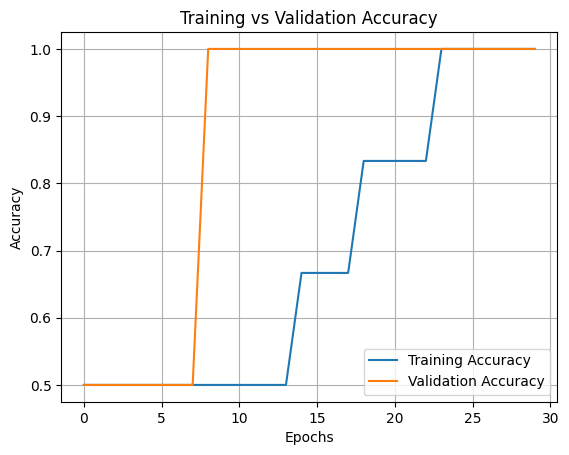

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()
